In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from models.model_fpgan import FPGANSynthesizer
from models.model_ctgan import CTGANSynthesizer
from models.model_dpctgan import DPCTGANSynthesizer

import ctgan
from sklearn.model_selection import train_test_split
from utils.privacy import normalized_avg_dist
from utils.fidelity import get_predictions, eval_fidelity, get_accuracy, get_roc_auc

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv("D:/Datasets/bankruptcy/data.csv")
data = data.drop(columns=[' Net Income Flag', ' Liability-Assets Flag'])
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Current Liability to Current Assets,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.118250,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.047775,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.025346,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.067250,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.047725,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,0.035490


In [4]:
data.shape

(6819, 94)

In [5]:
#normalized_data=(data-data.mean())/data.std()
data=(data-data.min())/(data.max()-data.min())

In [6]:
target = 'Bankrupt?'

In [7]:
X = data.drop(columns=[target])
y = data[target]

In [8]:
#model_ctgan = CTGANSynthesizer(epochs=25, verbose=True)
#model_ctgan = DPCTGANSynthesizer(verbose=True)
model_ctgan = FPGANSynthesizer(epochs=25, verbose=True)
#original_losses, tranformed_privacies, losses = model_ctgan.fit(data)
model_ctgan.fit(data, rate=0.25)

Epoch 1, Loss G: -0.1127,Loss D: -5.8975
Epoch 2, Loss G: -0.2616,Loss D: -3.1213
Epoch 3, Loss G: -0.4242,Loss D: -0.7797
Epoch 4, Loss G: -0.4158,Loss D: -0.2401
Epoch 5, Loss G: -0.3636,Loss D: -0.2692
Epoch 6, Loss G: -0.2824,Loss D: -1.1045
Epoch 7, Loss G: -0.1642,Loss D: -0.3306
Epoch 8, Loss G: -0.0999,Loss D: -1.4981
Epoch 9, Loss G: -0.0281,Loss D: -2.2717
Epoch 10, Loss G: -0.1825,Loss D: -1.0574
Epoch 11, Loss G: -0.1248,Loss D: -1.7808
Epoch 12, Loss G: -0.2700,Loss D: -1.0305
Epoch 13, Loss G: -0.3576,Loss D: -0.4244
Epoch 14, Loss G: -0.4384,Loss D: -0.4173
Epoch 15, Loss G: -0.3486,Loss D:  0.5715
Epoch 16, Loss G: -0.3690,Loss D: -0.7556
Epoch 17, Loss G: -0.3296,Loss D: -0.4347
Epoch 18, Loss G: -0.3128,Loss D:  0.2900
Epoch 19, Loss G: -0.1722,Loss D: -0.1753
Epoch 20, Loss G: -0.2140,Loss D:  0.2008
Epoch 21, Loss G: -0.1624,Loss D: -0.0220
Epoch 22, Loss G: -0.1529,Loss D:  1.0445
Epoch 23, Loss G: -0.1685,Loss D: -0.5096
Epoch 24, Loss G: -0.1953,Loss D: -0.2705
E

([array(0.03166354, dtype=float32),
  array(0.05655231, dtype=float32),
  array(0.08890805, dtype=float32),
  array(0.16042137, dtype=float32),
  array(0.22092898, dtype=float32),
  array(0.33661848, dtype=float32),
  array(0.4301167, dtype=float32),
  array(0.5065693, dtype=float32),
  array(0.58588666, dtype=float32),
  array(0.6845745, dtype=float32),
  array(0.7152324, dtype=float32),
  array(0.75090766, dtype=float32),
  array(0.81863105, dtype=float32),
  array(0.8337141, dtype=float32),
  array(0.8406346, dtype=float32),
  array(0.7904204, dtype=float32),
  array(0.7841313, dtype=float32),
  array(0.68811554, dtype=float32),
  array(0.6652002, dtype=float32),
  array(0.5631816, dtype=float32),
  array(0.5835349, dtype=float32),
  array(0.36727786, dtype=float32),
  array(0.3474176, dtype=float32),
  array(0.2618795, dtype=float32),
  array(0.15049958, dtype=float32),
  array(0.08426721, dtype=float32),
  array(-0.06367341, dtype=float32),
  array(-0.20637608, dtype=float32),
  a

In [9]:
from utils.utils import save_models
save_models(model_ctgan, '025fpgan25', 'bankruptcy')

In [10]:
from utils.utils import load_models
model_ctgan = load_models('025fpgan25', 'bankruptcy')

In [11]:
samples = model_ctgan.sample(len(data))  # Synthetic copy
samples.dropna(how='any', inplace=True)

X_syn = samples.drop(columns=[target])
y_syn = samples[target]
y_syn = y_syn.round(0)
y_syn = y_syn.astype(int)

## Privacy

In [12]:
samples = samples.apply(pd.to_numeric) # convert all columns of DataFrame
data = data.apply(pd.to_numeric) # convert all columns of DataFrame
samples = samples[:2000]
data = data[:2000]

In [13]:
normalized_avg_distance = normalized_avg_dist(samples, data)
print(normalized_avg_distance)

[0.08027381]


## Fidelity

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

X_syn_train, X_syn_test, y_syn_train, y_syn_test = train_test_split(X_syn, y_syn, test_size=0.3, random_state=42, stratify=y_syn)

rr_pred = []
fr_pred = []
ff_pred = []
rf_pred = []

rr_pred = get_predictions(X_train, y_train, X_test, y_test)
fr_pred = get_predictions(X_syn_train, y_syn_train, X_test, y_test)

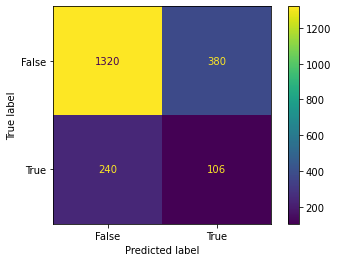

In [15]:
from sklearn import metrics
def print_confusion_matrix(rr_pred, fr_pred):
    confusion_matrix = metrics.confusion_matrix(rr_pred, fr_pred)

    cm_display1 = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

    cm_display1.plot()
    plt.show()
    
print_confusion_matrix(rr_pred, fr_pred)

In [16]:
percentage = eval_fidelity(rr_pred, fr_pred)

In [17]:
rr_acc = get_accuracy(y_test, rr_pred)
fr_acc = get_accuracy(y_test, fr_pred)
print("Accuracy of real data: ", rr_acc)
print("Accuracy of synthetic data: ", fr_acc)

Accuracy of real data:  0.8504398826979472
Accuracy of synthetic data:  0.7536656891495601


In [18]:
rr_score = get_roc_auc(y_test, rr_pred)
fr_score = get_roc_auc(y_test, fr_pred)
print("ROC AUC of real data: ", rr_score)
print("ROC AUC of synthetic data: ", fr_score)

ROC AUC of real data:  0.8275252525252526
ROC AUC of synthetic data:  0.5651515151515152


In [19]:
# from utils.fidelity import get_class_ratios
# rr_class1, rr_class2 = get_class_ratios(rr_pred, fr_pred, target)
# print("Class 1 ratio of real data: ", rr_class1)

## Final plot

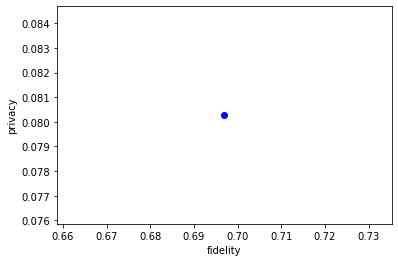

0.696969696969697 [0.08027381]


In [20]:
plt.scatter(percentage, normalized_avg_distance, c ="blue")
plt.xlabel("fidelity")
plt.ylabel("privacy")
plt.show()
print(percentage, normalized_avg_distance)